In [46]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
mpl.style.use('classic')

In [47]:
df = pd.read_csv("/content/Iris.csv", usecols=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

###Visualising the data



In [49]:
df["CSpecies"]=[(0 if (flw=='Iris-setosa')else 1\
                      if (flw=='Iris-versicolor')else 2)\
                      for flw in df['Species']]

In [50]:
setosa = df[df['Species']=='Iris-setosa']

In [51]:
versicolor =df[df['Species']=='Iris-versicolor']

In [52]:
virginica =df[df['Species']=='Iris-virginica']

In [53]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'CSpecies'],
      dtype='object')

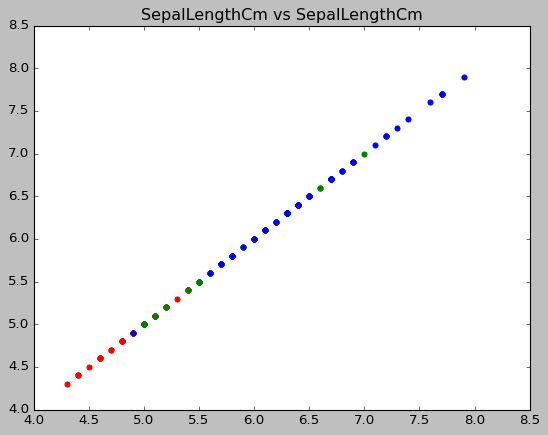

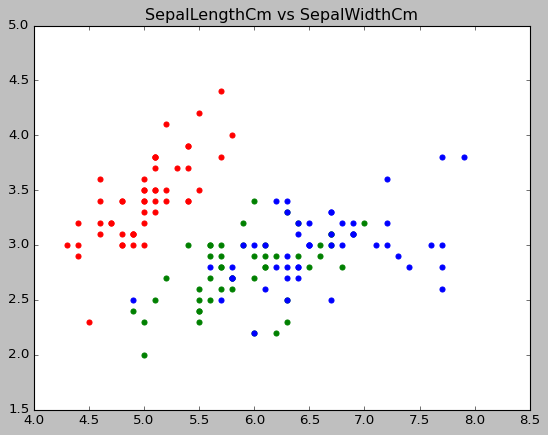

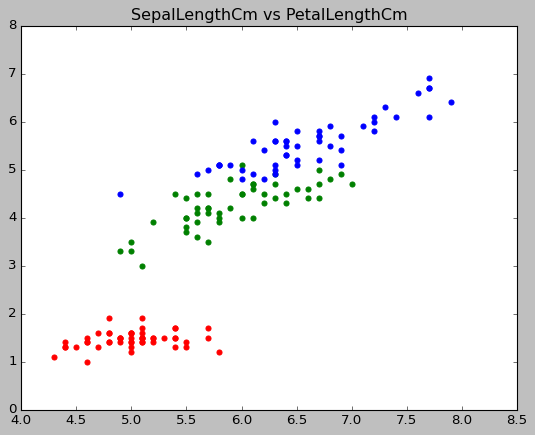

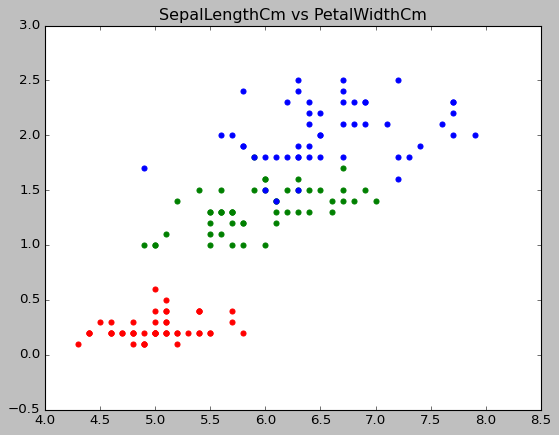

In [54]:
j=0
for i in range(4):
    plt.scatter(setosa[df.columns[j]],setosa[df.columns[i]],color='r')
    plt.scatter(versicolor[df.columns[j]],versicolor[df.columns[i]],color='g')
    plt.scatter(virginica[df.columns[j]],virginica[df.columns[i]],color='b')
    plt.title("{0} vs {1}".format(df.columns[j],df.columns[i]))
    plt.show()

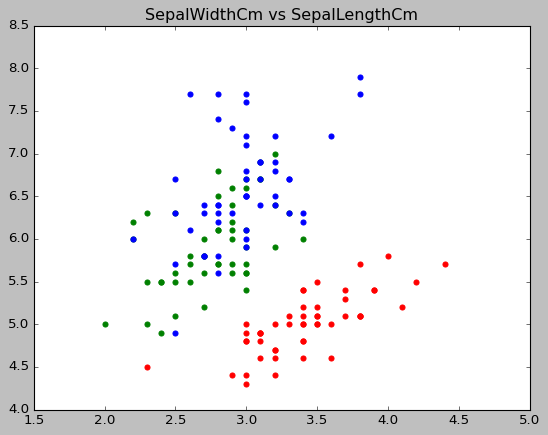

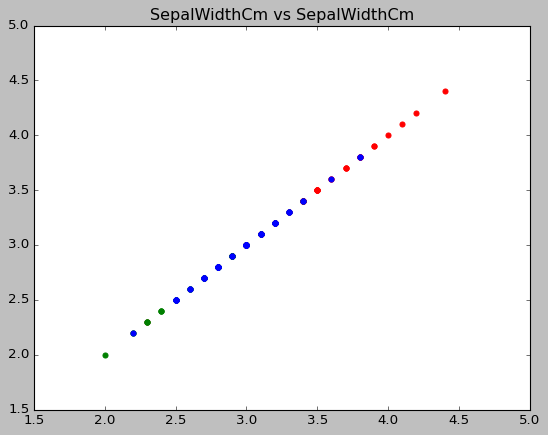

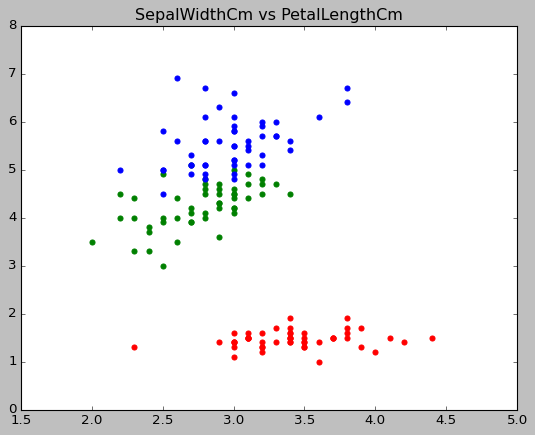

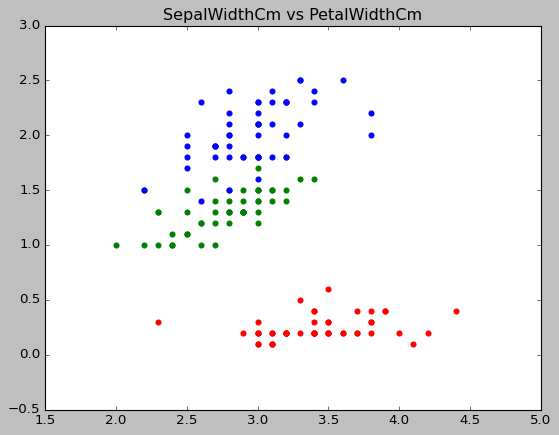

In [55]:
j=1
for i in range(4):
    plt.scatter(setosa[df.columns[j]],setosa[df.columns[i]],color='r')
    plt.scatter(versicolor[df.columns[j]],versicolor[df.columns[i]],color='g')
    plt.scatter(virginica[df.columns[j]],virginica[df.columns[i]],color='b')
    plt.title("{0} vs {1}".format(df.columns[j],df.columns[i]))
    plt.show()


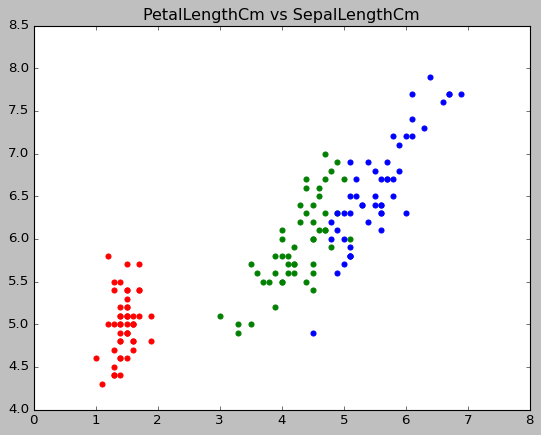

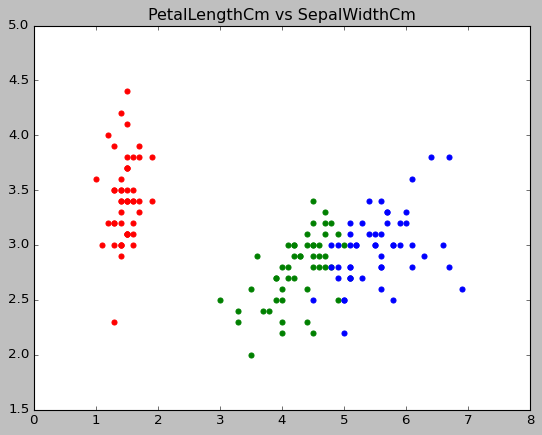

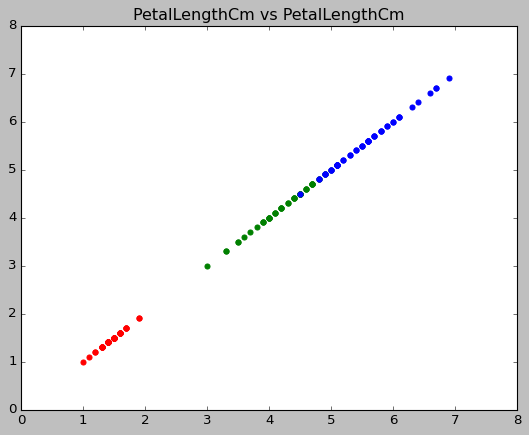

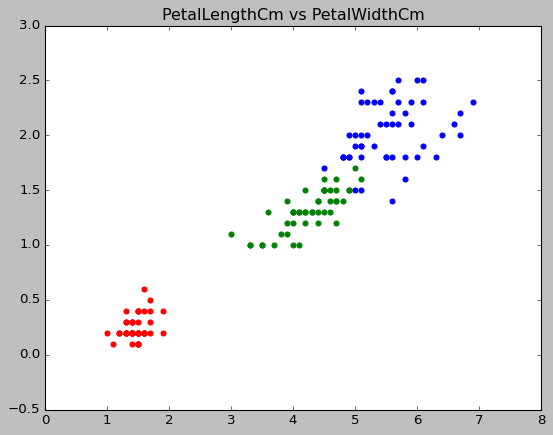

In [56]:
j=2
for i in range(4):
    plt.scatter(setosa[df.columns[j]],setosa[df.columns[i]],color='r')
    plt.scatter(versicolor[df.columns[j]],versicolor[df.columns[i]],color='g')
    plt.scatter(virginica[df.columns[j]],virginica[df.columns[i]],color='b')
    plt.title("{0} vs {1}".format(df.columns[j],df.columns[i]))
    plt.show()

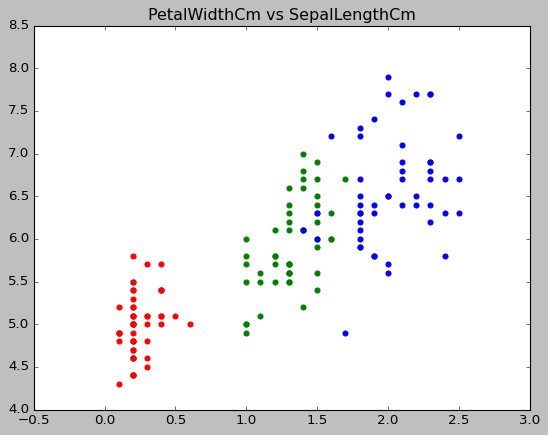

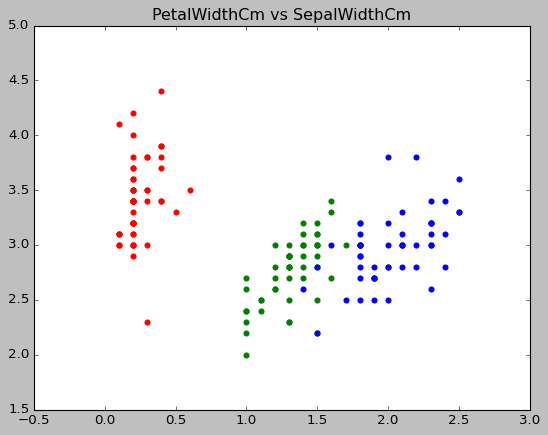

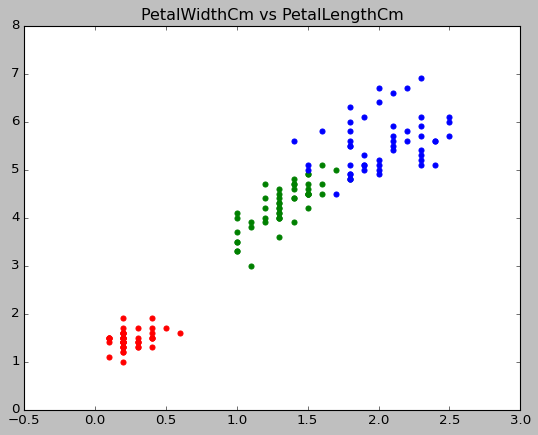

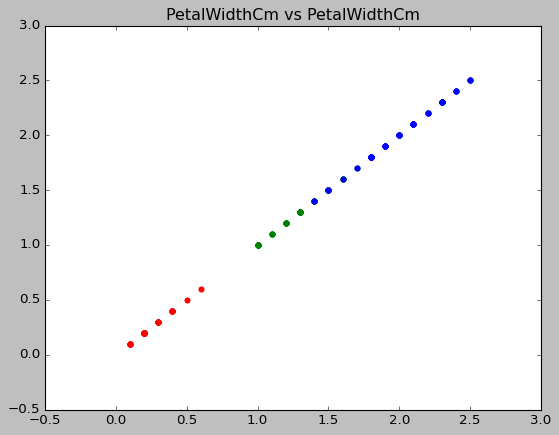

In [57]:
j=3
for i in range(4):
    plt.scatter(setosa[df.columns[j]],setosa[df.columns[i]],color='r')
    plt.scatter(versicolor[df.columns[j]],versicolor[df.columns[i]],color='g')
    plt.scatter(virginica[df.columns[j]],virginica[df.columns[i]],color='b')
    plt.title("{0} vs {1}".format(df.columns[j],df.columns[i]))
    plt.show()



### From the above visualization,it is observed that PetalLengthCm Vs PetalWidthCm is best at j=2


In [58]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,CSpecies
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
CSpecies,0.782561,-0.419446,0.949043,0.956464,1.000000


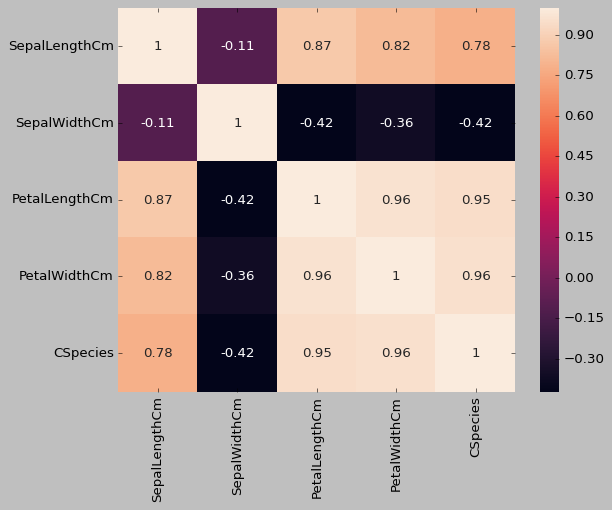

In [59]:
sb.heatmap(df.corr(),annot=True)

In [60]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,CSpecies
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


Divide into input and output

In [61]:
x=df.iloc[:,0:4].values
y=df.iloc[:,5].values

Train and Test the variables

In [62]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4,random_state=0)

In [63]:
x_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

###SVC Using Linear

In [64]:
svc_linear= SVC(kernel='linear',random_state=0)
svc_linear.fit(x_train,y_train)
y_pred_linear=svc_linear.predict(x_test)

In [65]:
y_pred_linear

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [66]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

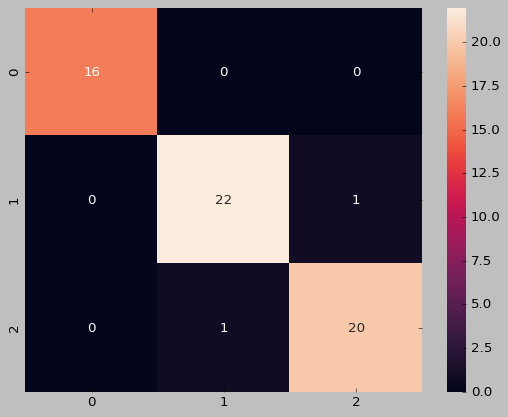

In [67]:
sb.heatmap(confusion_matrix(y_pred_linear,y_test),annot=True)

Custom input

In [68]:
features = [[5.8, 2.8, 5.1, 2.4]]
svc_linear.predict(features)

array([2])

In [69]:
accuracy_score(y_pred_linear,y_test)

0.9666666666666667

In [70]:
cls_rpt_linear= classification_report(y_test,y_pred_linear)
print(cls_rpt_linear)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



###SVC Using RBF

In [71]:
svc_rbf= SVC(kernel='rbf',random_state=0)
svc_rbf.fit(x_train,y_train)
y_pred_rbf=svc_rbf.predict(x_test)

In [72]:
features = [[5.8, 2.8, 5.1, 2.4]]
svc_rbf.predict(features)

array([2])

###Confusion Matrix

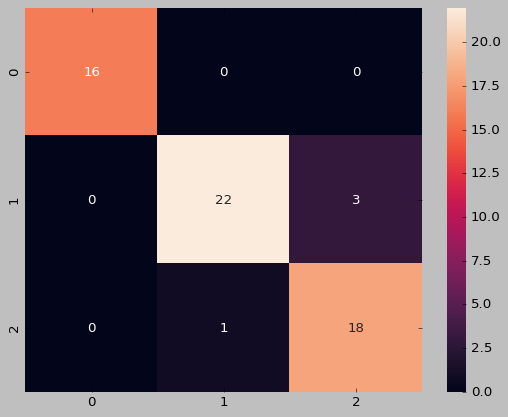

In [73]:
sb.heatmap(confusion_matrix(y_pred_rbf,y_test),annot=True)

In [74]:
accuracy_score(y_test,y_pred_rbf)

0.9333333333333333

In [75]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [76]:
cls_rpt= classification_report(y_test,y_pred_rbf)
print(cls_rpt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.96      0.92        23
           2       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



## Comparing Result Between SVC_Linear Vs SVC_RBF

SVC_Linear

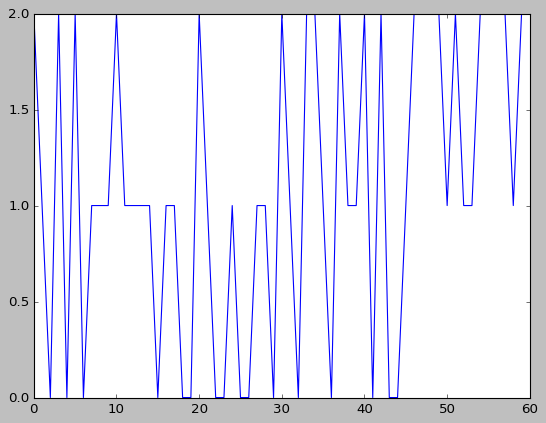

In [77]:
plt.plot(y_pred_linear)

SVC_RBF

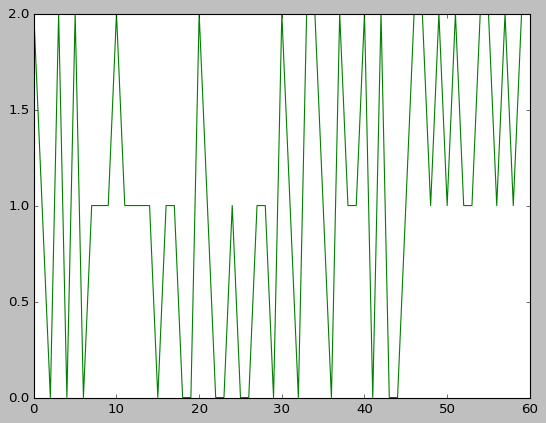

In [78]:
plt.plot(y_pred_rbf,'g')

Actual

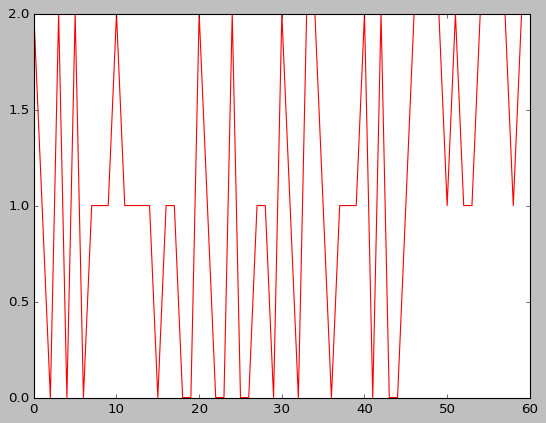

In [79]:
plt.plot(y_test,'r')

###K Fold Cross Validation (Manual)

In [80]:
kf = KFold(n_splits=5)

In [81]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [82]:

folds = StratifiedKFold(n_splits=10)
scores_svm_linear = []
scores_svm_rbf = []

for train_index, test_index in folds.split(x,y):
    x_train, x_test, y_train, y_test = x_train, x_test, \
                                       y_train, y_test
    scores_svm_linear.append(get_score(svc_linear, x_train, x_test, y_train, y_test))
    scores_svm_rbf.append(get_score(svc_rbf, x_train, x_test, y_train, y_test))

## Average Kfold Linear SVM

In [83]:
sum(scores_svm_linear)/len(scores_svm_linear)

0.9666666666666666

## Average Kfold RBF SVM

In [84]:
sum(scores_svm_rbf)/len(scores_svm_rbf)

0.9333333333333333

## Cross Validation (SKLearn)

In [85]:
cross_val_score(svc_linear, x_test,y_test,cv=10).reshape(-1,1).mean()

0.9833333333333334

In [86]:
cross_val_score(svc_rbf, x_test,y_test,cv=10).reshape(-1,1).mean()

0.95